# Installing MIMIC-III in a local Postgres database on Windows

## Reference

* Github repo: https://github.com/MIT-LCP/mimic-code/tree/master/buildmimic/postgres
* Win setup guide: https://mimic.physionet.org/tutorials/install-mimic-locally-windows/
    * Win postgres installer: https://www.postgresql.org/download/windows/
    * port number the server should listen to: 5432
    * Installation Directory: C:\Program Files\PostgreSQL\10
    * Server Installation Directory: C:\Program Files\PostgreSQL\10
    * Data Directory: C:\Program Files\PostgreSQL\10\data
    * Database Port: 5432
    * Database Superuser: postgres
    * Operating System Account: NT AUTHORITY\NetworkService
    * Database Service: postgresql-x64-10
    * Command Line Tools Installation Directory: C:\Program Files\PostgreSQL\10
    * pgAdmin4 Installation Directory: C:\Program Files\PostgreSQL\10\pgAdmin 4
    * Stack Builder Installation Directory: C:\Program Files\PostgreSQL\10
* Linux setup guide: https://mimic.physionet.org/tutorials/install-mimic-locally-ubuntu/
* Check / Report issue page: https://github.com/MIT-LCP/mimic-code/issues

## Prerequisite 

* Download the MIMIC-III Clinical Database (see here for details on gaining access).
* Extract the MIMIC-III Clinical Database as .csv files somewhere on your local computer.
* Download the PostgreSQL scripts from here - only the files which end in .sql are required.
    * https://github.com/MIT-LCP/mimic-code/tree/master/buildmimic/postgres

## Setup steps

In the SQL shell, follow below steps (one command a time) to set up the database locally
* https://mimic.physionet.org/tutorials/install-mimic-locally-windows/
* Note to use 'postgres_create_tables_pg10.sql' when creating tables, will build db faster

## Query practise

In the SQL shell, follow below steps to query the database. 
* https://mimic.physionet.org/tutorials/intro-to-mimic-iii/
* Two tools can use
    1. SQL Shell in command lines
    2. pqAdmin 4 in UI form

## Now run SQL in Jupyter on Python3 kernel

Now we run SQL queries in Jupyter notebook, using same examples from 1.4

In [8]:
# import libraries
# In WIN environment and use Annaconda.
# To avoid loading error, activate Anaconda envrionment --> pip install psycopg2

import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
%matplotlib inline
plt.style.use('ggplot')

### Create a database connection

In [9]:
user = 'postgres'
password = 'postgres'      # note if you want to set password for offline pracise would be fine, but don't post to repository
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'        # set to your defined schema name, I use mimiciii here

### Connect to the database

In [10]:
con = psycopg2.connect(dbname=dbname, user=user, host=host, password=password)
cur = con.cursor()
cur.execute('SET search_path to {}'.format(schema))          # this is compulsory step to find your database
print('Thread opened' if not cur.closed else 'Thread closed')

Password:········


Load SQL command after query = \ lines, """ loaded within """

### Find patients record in diagnoses_icd table

With icd9_code connect to d_icd_diagnoses table

In [32]:
query = \
"""
select * from DIAGNOSES_ICD;
"""
data = pd.read_sql_query(query, con)
data.sort_values(by = ['icd9_code'])[0:19]

,row_id,subject_id,hadm_id,seq_num,icd9_code
304974,307770,27367,136441,7.0,0030
505370,497329,65733,168926,9.0,0030
519876,513229,69141,136542,1.0,0031
594655,579783,83908,180356,3.0,0038
414953,398507,44437,181557,10.0,0038
394051,408925,46693,183574,4.0,0039
565807,584098,84972,121388,1.0,0041
87353,77239,6928,182382,12.0,0041
128071,135642,12021,184622,4.0,0041
112541,110229,9833,167211,5.0,0048


### Find d_icd_disgnoses information

In [50]:
query = \
"""
select * from d_icd_diagnoses;
"""
data = pd.read_sql_query(query, con)
print(data.shape[0])
result = data[data['long_title'].str.contains('diabe')]
print(result.shape[0])
result[:19]

14567
36


,row_id,icd9_code,short_title,long_title
1812,1813,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
1813,1814,24901,Sec DM wo comp uncontrld,Secondary diabetes mellitus without mention of...
1814,1815,24910,Sec DM keto nt st uncntr,"Secondary diabetes mellitus with ketoacidosis,..."
1815,1816,24911,Sec DM ketoacd uncntrld,"Secondary diabetes mellitus with ketoacidosis,..."
1816,1817,24920,Sec DM hpros nt st uncnr,Secondary diabetes mellitus with hyperosmolari...
1817,1818,24921,Sec DM hprosmlr uncntrld,Secondary diabetes mellitus with hyperosmolari...
1818,1819,24930,Sec DM ot cma nt st uncn,"Secondary diabetes mellitus with other coma, n..."
1819,1820,24931,Sec DM oth coma uncntrld,"Secondary diabetes mellitus with other coma, u..."
1820,1821,24940,Sec DM renl nt st uncntr,Secondary diabetes mellitus with renal manifes...
1821,1822,24941,Sec DM renal uncontrld,Secondary diabetes mellitus with renal manifes...


### Connect DIAGNOSES_ICD and d_icd_diagnoses, find all icd9_code starting with 290

* Note tables are case-insensitive here
* 249 secondary diabetes mellitus (includes the following codes: 249,
249.0, 249.00, 249.01, 249.1, 249.10, 249.11, 249.2, 249.20, 249.21,
249.3, 249.30, 249.31, 249.4, 249.40, 249.41, 249.5, 249.50, 249.51,
249.6, 249.60, 249.61, 249.7, 249.70, 249.71, 249.8, 249.80, 249.81,
249.9, 249.90, 249.91)
* 250 diabetes mellitus
(includes the following codes: 250, 250.0, 250.00, 250.01, 250.02,
250.03, 250.1, 250.10, 250.11, 250.12, 250.13, 250.2, 250.20, 250.21,
250.22, 250.23, 250.3, 250.30, 250.31, 250.32, 250.33, 250.4, 250.40,
250.41, 250.42, 250.43, 250.5, 250.50, 250.51, 250.52, 250.53, 250.6,
250.60, 250.61, 250.62, 250.63, 250.7, 250.70, 250.71, 250.72, 250.73,
250.8, 250.80, 250.81, 250.82, 250.83, 250.9, 250.90, 250.91, 250.92,
250.93)

In [51]:
query = \
"""
select di.subject_id, di.hadm_id, di.seq_num, di.icd9_code, did.short_title, did.long_title
from diagnoses_icd di inner join d_icd_diagnoses did
on di.icd9_code = did.icd9_code
"""
data = pd.read_sql_query(query, con)
print('totally:', data.shape[0], ' lines of data')
result = data[data['icd9_code'].str.match('249') | data['icd9_code'].str.match('250')].sort_values(by = ['icd9_code'])
print('totally:', result.shape[0], ' lines of records')
result

totally: 634709  lines of data
totally: 16580  lines of records


,subject_id,hadm_id,seq_num,icd9_code,short_title,long_title
331232,29767,163441,10,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
509888,72582,117745,18,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
362323,41448,134363,5,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
579164,90403,103315,19,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
471194,61825,181643,13,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
476173,62284,126960,11,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
296870,26705,106423,8,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
560053,78473,186925,10,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
412174,48539,100035,24,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...
494337,65949,132974,9,24900,Sec DM wo cmp nt st uncn,Secondary diabetes mellitus without mention of...


### find all records in patients table

In [11]:
query = \
"""
select * from patients;  
"""
data = pd.read_sql_query(query, con)
data.head()     # display the first few rows of the data

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,234,249,F,2075-03-13,NaT,NaT,NaT,0
1,235,250,F,2164-12-27,2188-11-22,2188-11-22,NaT,1
2,236,251,M,2090-03-15,NaT,NaT,NaT,0
3,237,252,M,2078-03-06,NaT,NaT,NaT,0
4,238,253,F,2089-11-26,NaT,NaT,NaT,0


### find all reords in admissions table

In [56]:
query = \
"""
select * from admissions;
"""
data = pd.read_sql_query(query, con)
data.head() 

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,NaT,NaT,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaT,NaT,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,None,PROTESTANT QUAKER,SINGLE,WHITE,NaT,NaT,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


### find how many patients we have 

In [57]:
query = \
"""
select count(*) from patients;
"""
data = pd.read_sql_query(query, con)
data

,count
0,46520


### what genders we have in patients 'M' and 'F'

In [58]:
query = \
"""
select distinct(gender) from patients;
"""
data = pd.read_sql_query(query, con)
data

,gender
0,M
1,F


### find how many female patients

In [59]:
query = \
"""
select count(*) from patients where gender = 'F';
"""
data = pd.read_sql_query(query, con)
data

,count
0,20399


### number of patients, grouped by gender

In [60]:
query = \
"""
select gender, count(*) from patients group by gender;
"""
data = pd.read_sql_query(query, con)
data

,gender,count
0,M,26121
1,F,20399


### find mortalities record in patients

In [61]:
query = \
"""
select expire_flag, count(*) from patients group by expire_flag;
"""
data = pd.read_sql_query(query, con)
data

,expire_flag,count
0,0,30761
1,1,15759


### patients age and mortality - this is a longer command so I used block comment

In [63]:
query = \
"""
select p.subject_id, p.dob, a.hadm_id, a.admittime, p.expire_flag		
from admissions a inner join patients p		-- admissions as a, patient table as p, inner join them as one table
on p.subject_id = a.subject_id;  			-- using keys to connect the two tables
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,dob,hadm_id,admittime,expire_flag
0,22,2131-05-07,165315,2196-04-09 12:26:00,0
1,23,2082-07-17,152223,2153-09-03 07:15:00,0
2,23,2082-07-17,124321,2157-10-18 19:34:00,0
3,24,2100-05-31,161859,2139-06-06 16:14:00,0
4,25,2101-11-21,129635,2160-11-02 02:06:00,0


### find first admission time

* 1. connect admissions table (as a) with patients table (as p) by inner join,
* 2. define min (a.admittime) as earliest admittime and rename to first_admittime
* 3. find first_admittime under every group of p.subject_id (every patient)

In [65]:
query = \
"""
select 
	p.subject_id, p.dob, a.hadm_id, a.admittime, p.expire_flag, 
	min (a.admittime) over (partition by p.subject_id) as first_admittime
from admissions a inner join patients p
on p.subject_id = a.subject_id
order by a.hadm_id, p.subject_id;
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,dob,hadm_id,admittime,expire_flag,first_admittime
0,58526,2082-03-21,100001,2117-09-11 11:46:00,0,2117-09-11 11:46:00
1,54610,2090-05-19,100003,2150-04-17 15:34:00,1,2150-04-17 15:34:00
2,9895,2059-05-07,100006,2108-04-06 15:49:00,1,2108-04-06 15:49:00
3,23018,2071-06-04,100007,2145-03-31 05:33:00,0,2145-03-31 05:33:00
4,533,2101-07-30,100009,2162-05-16 15:56:00,0,2162-05-16 15:56:00


### add age group

* 1. create temporary table first_admission_time, include:
    - subject_id, dob, gender from p;
    - first_admittime, first_admit_age abstracted from a via below formula;
* 2. select same columns, use case function to create an age_group column:
    - categorize by different age range
* 3. order by subject_id

In [66]:
query = \
"""
with first_admission_time as 
	(select 
	 	p.subject_id, p.dob, p.gender, 
		min(a.admittime) as first_admittime,
		min(round((cast(admittime as date) - cast(dob as date)) / 365.242, 2)) as first_admit_age
	from patients p inner join admissions a
	on p.subject_id = a.subject_id
	group by p.subject_id, p.dob, p.gender
	order by p.subject_id
	)
select 
	subject_id, dob, gender, first_admittime, first_admit_age,
	case 					-- all ages >89 in the datbase were replaced with 300
		when first_admit_age > 89	then '>89'
		when first_admit_age >=14	then 'adult'
		when first_admit_age <=1	then 'neonate'	
		else 'middle'
		end as age_group
from first_admission_time
order by subject_id
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,dob,gender,first_admittime,first_admit_age,age_group
0,2,2138-07-17,M,2138-07-17 19:04:00,0.00,neonate
1,3,2025-04-11,M,2101-10-20 19:08:00,76.52,adult
2,4,2143-05-12,F,2191-03-16 00:28:00,47.84,adult
3,5,2103-02-02,M,2103-02-02 04:31:00,0.00,neonate
4,6,2109-06-21,F,2175-05-30 07:15:00,65.94,adult


### now we pipe these two tables and add count functio

In [67]:
query = \
"""
with first_admission_time as 
	(select 
	 	p.subject_id, p.dob, p.gender, 
		min(a.admittime) as first_admittime,
		min(round((cast(admittime as date) - cast(dob as date)) / 365.242, 2)) as first_admit_age
	from patients p inner join admissions a
	on p.subject_id = a.subject_id
	group by p.subject_id, p.dob, p.gender
	order by p.subject_id
	),		-- define first_admission_time table, derived from admissions and patients	
	age as
	(select
	 	subject_id, dob, gender, first_admittime, first_admit_age,
	 	case
	 		-- all ages > 90 in the databse were replaced with 300
	 		-- we check using > 100 as a conservative threshold to ensure capture them
	 		when first_admit_age > 100 	then '>89'
	 		when first_admit_age >=14	then 'adult'
	 		when first_admit_age <=1	then 'neonate'
	 		else 'middle'
	 		end as age_group
	 from first_admission_time
	)		-- define age table, derived from first_admission_time
select age_group, gender, count(subject_id) as NumberofPatients
from age
group by age_group, gender
"""
data = pd.read_sql_query(query, con)
data.head()

,age_group,gender,numberofpatients
0,adult,F,15476
1,neonate,M,4245
2,>89,F,1294
3,neonate,F,3629
4,adult,M,21179


### ICU stays

In [68]:
query = \
"""
select * from transfers;
"""
data = pd.read_sql_query(query, con)
data.head()

,row_id,subject_id,hadm_id,icustay_id,dbsource,eventtype,prev_careunit,curr_careunit,prev_wardid,curr_wardid,intime,outtime,los
0,657,111,192123,254245.0,carevue,transfer,CCU,MICU,7.0,23.0,2142-04-29 15:27:11,2142-05-04 20:38:33,125.19
1,658,111,192123,NaN,carevue,transfer,MICU,None,23.0,45.0,2142-05-04 20:38:33,2142-05-05 11:46:32,15.13
2,659,111,192123,NaN,carevue,discharge,None,None,45.0,NaN,2142-05-05 11:46:32,NaT,NaN
3,660,111,155897,249202.0,metavision,admit,None,MICU,NaN,52.0,2144-07-01 04:13:59,2144-07-01 05:19:39,1.09
4,661,111,155897,NaN,metavision,transfer,MICU,None,52.0,32.0,2144-07-01 05:19:39,2144-07-01 06:28:29,1.15


### ICU stay example

In [69]:
query = \
"""
select * from transfers where hadm_id = 112213;
"""
data = pd.read_sql_query(query, con)
data.head()

,row_id,subject_id,hadm_id,icustay_id,dbsource,eventtype,prev_careunit,curr_careunit,prev_wardid,curr_wardid,intime,outtime,los
0,54,12,112213,NaN,carevue,admit,None,None,NaN,27.0,2104-08-07 00:28:11,2104-08-07 18:57:32,18.49
1,55,12,112213,NaN,carevue,transfer,None,None,27.0,2.0,2104-08-07 18:57:32,2104-08-08 02:08:17,7.18
2,56,12,112213,232669.0,carevue,transfer,None,SICU,2.0,23.0,2104-08-08 02:08:17,2104-08-08 02:52:32,0.74
3,57,12,112213,NaN,carevue,transfer,SICU,None,23.0,49.0,2104-08-08 02:52:32,2104-08-08 04:38:56,1.77
4,58,12,112213,232669.0,carevue,transfer,None,SICU,49.0,23.0,2104-08-08 04:38:56,2104-08-15 17:22:25,180.72


### Services 

prev_service and curr_service type, and transfertime

In [70]:
query = \
"""
select * from services;
"""
data = pd.read_sql_query(query, con)
data.head()

,row_id,subject_id,hadm_id,transfertime,prev_service,curr_service
0,758,471,135879,2122-07-22 14:07:27,TSURG,MED
1,759,471,135879,2122-07-26 18:31:49,MED,TSURG
2,760,472,173064,2172-09-28 19:22:15,None,CMED
3,761,473,129194,2201-01-09 20:16:45,None,NB
4,762,474,194246,2181-03-23 08:24:41,None,NB


### How to gather useful information about patients admitted to ICU?

* Step 1 - retrieve subject_id, hadm_id, intime, outtime from icustays table;

In [71]:
query = \
"""
select ie.subject_id, ie.hadm_id, ie.icustay_id, ie.intime, ie.outtime from icustays ie;
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,hadm_id,icustay_id,intime,outtime
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13


* Step 2 - retrieve calculated age of patients, using patients table;

In [72]:
query = \
"""
select ie.subject_id, ie.hadm_id, ie.icustay_id, ie.intime, ie.outtime,
		round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) as age
from icustays ie inner join patients pat
on ie.subject_id = pat.subject_id;
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,hadm_id,icustay_id,intime,outtime,age
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,65.98
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,40.10
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,80.08
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,45.68
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,67.10


* Step 3 - Separate age group, separate neonates from adults;

In [73]:
query = \
"""
select ie.subject_id, ie.hadm_id, ie.icustay_id, ie.intime, ie.outtime,
		round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) as age,
	case 
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <= 1 	then 'neonate'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <=14	then 'middle'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) > 100	then '>89'
		else 'adult'
		end as icustay_age_group
from icustays ie inner join patients pat
on ie.subject_id = pat.subject_id;
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,hadm_id,icustay_id,intime,outtime,age,icustay_age_group
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,65.98,adult
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,40.10,adult
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,80.08,adult
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,45.68,adult
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,67.10,adult


* Step 4 - incorporate admissions table, find how long the stay is before admit to ICU;

In [74]:
query = \
"""
select ie.subject_id, ie.hadm_id, ie.icustay_id, ie.intime, ie.outtime,
		round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) as age,
		round( (cast(ie.intime as date) - cast(adm.admittime as date)) / 365.242, 2) as preiculos,
	case 
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <= 1 	then 'neonate'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <=14	then 'middle'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) > 100	then '>89'
		else 'adult'
		end as icustay_age_group
-- notice here we have 3 tables connect by 2 keys: 
-- icustays -- subject_id -- patients
-- icustays -- hadm_id -- admissions
from icustays ie inner join patients pat on ie.subject_id = pat.subject_id
				inner join admissions adm on ie.hadm_id = adm.hadm_id;  
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,hadm_id,icustay_id,intime,outtime,age,preiculos,icustay_age_group
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,65.98,0.01,adult
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,40.10,0.00,adult
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,80.08,0.00,adult
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,45.68,0.00,adult
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,67.10,0.00,adult


* Step 5 - find date of patient's death;

In [75]:
query = \
"""
select ie.subject_id, ie.hadm_id, ie.icustay_id, ie.intime, ie.outtime, adm.deathtime,
		round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) as age,
		round( (cast(ie.intime as date) - cast(adm.admittime as date)) / 365.242, 2) as preiculos,
	case 
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <= 1 	then 'neonate'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <=14	then 'middle'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) > 100	then '>89'
		else 'adult'
		end as icustay_age_group
from icustays ie inner join patients pat on ie.subject_id = pat.subject_id
				inner join admissions adm on ie.hadm_id = adm.hadm_id; 
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,hadm_id,icustay_id,intime,outtime,deathtime,age,preiculos,icustay_age_group
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,2198-02-18 03:55:00,65.98,0.01,adult
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,NaT,40.10,0.00,adult
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,NaT,80.08,0.00,adult
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,NaT,45.68,0.00,adult
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,NaT,67.10,0.00,adult


* Step 6 - find those die in hospital;

In [76]:
# step6
query = \
"""
select ie.subject_id, ie.hadm_id, ie.icustay_id, ie.intime, ie.outtime, adm.deathtime,
		round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) as age,
		round( (cast(ie.intime as date) - cast(adm.admittime as date)) / 365.242, 2) as preiculos,
	case 
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <= 1 	then 'neonate'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <=14	then 'middle'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) > 100	then '>89'
		else 'adult'
		end as icustay_age_group,
-- note there is already 'hospital_expire_flag' in admissions table which you could use
	case 
		when adm.hospital_expire_flag = 1	then 'Y'
		else 'N'
		end as hospital_expire_flag
from icustays ie inner join patients pat on ie.subject_id = pat.subject_id
				inner join admissions adm on ie.hadm_id = adm.hadm_id; 
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,hadm_id,icustay_id,intime,outtime,deathtime,age,preiculos,icustay_age_group,hospital_expire_flag
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,2198-02-18 03:55:00,65.98,0.01,adult,Y
1,269,106296,206613,2170-11-05 11:05:29,2170-11-08 17:46:57,NaT,40.10,0.00,adult,N
2,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,NaT,80.08,0.00,adult,N
3,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,NaT,45.68,0.00,adult,N
4,272,164716,210407,2186-12-25 21:08:04,2186-12-27 12:01:13,NaT,67.10,0.00,adult,N


* Step 7 - find how many deaths occurred within ICU.

In [77]:
query = \
"""
select ie.subject_id, ie.hadm_id, ie.icustay_id, ie.intime, ie.outtime, adm.deathtime,
		round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) as age,
		round( (cast(ie.intime as date) - cast(adm.admittime as date)) / 365.242, 2) as preiculos,
	case 
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <= 1 	then 'neonate'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) <=14	then 'middle'
		when round( (cast(ie.intime as date) - cast(pat.dob as date)) / 365.242, 2) > 100	then '>89'
		else 'adult'
		end as icustay_age_group,
-- note there is already 'hospital_expire_flag' in admissions table which you could use
	case 
		when adm.hospital_expire_flag = 1	then 'Y'
		else 'N'
		end as hospital_expire_flag,
-- note the hospital_expire_flag is equivalent to 'is adm.deathtime not null?'
	case 
		when adm.deathtime between ie.intime and ie.outtime	then 'Y'
		-- sometimes there are typographical errors in the death date so check before intime
		when adm.deathtime <= ie.intime 	then 'Y'
		when adm.deathtime <= ie.intime and adm.discharge_location = 'DEAD/EXPIRED'	then 'Y'
		else 'N'
		end as icustay_expire_flag
from icustays ie inner join patients pat on ie.subject_id = pat.subject_id
				inner join admissions adm on ie.hadm_id = adm.hadm_id; 
"""
data = pd.read_sql_query(query, con)
data.head()

,subject_id,hadm_id,icustay_id,intime,outtime,deathtime,age,preiculos,icustay_age_group,hospital_expire_flag,icustay_expire_flag
0,268,110404,280836,2198-02-14 23:27:38,2198-02-18 05:26:11,2198-02-18 03:55:00,65.98,0.01,adult,Y,Y
1,270,188028,220345,2128-06-24 15:05:20,2128-06-27 12:32:29,NaT,80.08,0.00,adult,N,N
2,271,173727,249196,2120-08-07 23:12:42,2120-08-10 00:39:04,NaT,45.68,0.00,adult,N,N
3,273,158689,241507,2141-04-19 06:12:05,2141-04-20 17:52:11,NaT,33.69,0.00,adult,N,N
4,274,130546,254851,2114-06-28 22:28:44,2114-07-07 18:01:16,NaT,66.11,0.00,adult,N,N


### Additional example: 

* Get length of stay from the icustays table

In [78]:
query = \
"""
SELECT i.subject_id, i.hadm_id, i.los
FROM icustays i;
"""
data = pd.read_sql_query(query,con)

* Compute the median LOS

In [79]:
avg_los = data.los.median()
print(avg_los)

2.09225


* Plot the distribution

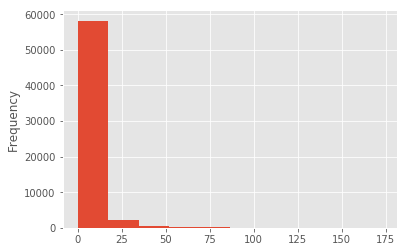

In [80]:
data.los.plot(kind='hist')

Ok, using SQL in the Jupyter passed.